In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_huggingface import ChatHuggingFace,HuggingFaceEndpoint
from typing import TypedDict

In [2]:
llm = HuggingFaceEndpoint(
    repo_id="meta-llama/Llama-3.1-8B-Instruct",
    task="text-generation",
)
model = ChatHuggingFace(llm=llm)

c:\coding\Langraph-Tutorial\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percent:float
    summary:str

In [35]:
def calculate_sr(state:BatsmanState)->BatsmanState:

    sr = (state['runs']/state['balls'])*100

    return {'sr':sr}

In [29]:
def calculate_bpb(state: BatsmanState):

    bpb = state['balls']/(state['fours'] + state['sixes'])

    return {'bpb': bpb}

In [30]:
def calculate_boundery_percent(state: BatsmanState):

    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100

    

    return {'boundary_percent':boundary_percent}

In [31]:
def calculate_summary(state: BatsmanState):

    summary = f"""
Strike Rate - {state['sr']} \n
Balls per boundary - {state['bpb']} \n
Boundary percent - {state['boundary_percent']}
"""
    
    

    return {'summary':summary}

In [32]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundery_percent',calculate_boundery_percent)
graph.add_node('calculate_summary',calculate_summary)

#add edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundery_percent')

graph.add_edge('calculate_sr','calculate_summary')
graph.add_edge('calculate_bpb','calculate_summary')
graph.add_edge('calculate_boundery_percent','calculate_summary')

graph.add_edge('calculate_summary',END)
workflow = graph.compile()

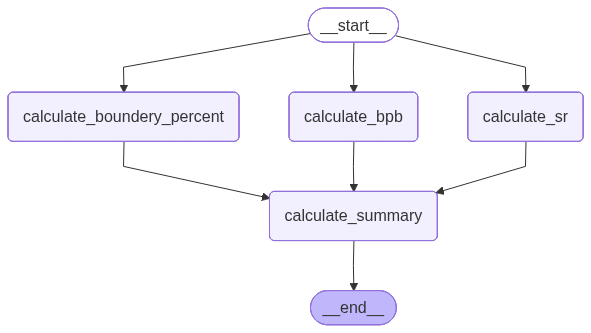

In [33]:
workflow

In [34]:
initial_state = {"runs":100,"balls":50,'fours':4,"sixes":6}

workflow.invoke(initial_state)


{'runs': 100,
 'balls': 50,
 'fours': 4,
 'sixes': 6,
 'sr': 0.02,
 'bpb': 5.0,
 'boundary_percent': 52.0,
 'summary': '\nStrike Rate - 0.02 \n\nBalls per boundary - 5.0 \n\nBoundary percent - 52.0\n'}